In [1]:
import autograd.numpy as np 
from autograd import grad
from scipy import optimize
import matplotlib.pyplot as plt

from stim_adj import stim_adj
from upload import retrieve_file

In this example, we use data from an L5PC neuron with one action potential to invert for impulse parameters. We assume the impulse is a Gaussian, determine the center of Gaussian from the action potential data, and invert for the height and duration of the impulse. 


## Load Data

In [10]:
retrieve_file?

In [4]:
# creating instance to load specific neuron data
neuron_type= 'L5PC'
num_ap = 1
inst_file = retrieve_file(neuron_type, num_ap)

#initialize variables dependent on ground truth data (from upload.py)
V_data, I_data, t_data, V0, dt, b = inst_file.load()


Default chosen of 1 Action Potential


## Invert for Parameters

In [ ]:
# set Hodgkin-Huxley model parameters and initial guess for impulse height and duration
HH_params = 120.0, 36.0, 0.3, 50.0, -77.0, -55.0, 1.0, 0.05, 0.6, 0.32
guess_a = 5.0
guess_c = 2.0

# creating instance to run the adjoint model
instance = stim_adj(V_data, t_data, dt, HH_params, guess_a, guess_c)


In [11]:
# determine the optimal impulse parameters (X) and save the corresponding voltage (V)

X, V = instance.recovery()

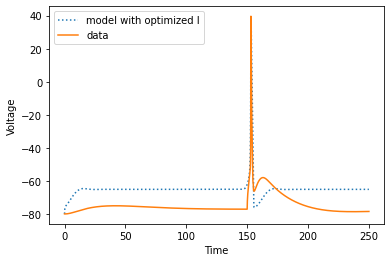

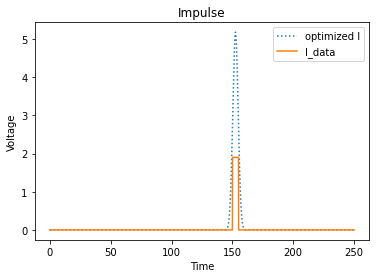

In [15]:
# reconstruct impulse from optimized parameters
t = np.arange(0, t_data[-1], dt)
I = X[0]*np.exp(-(t-b)**2/(2*X[1]**2))

plt.figure()
plt.plot(t, V, ls = 'dotted', label = 'model with optimized I')
plt.plot(t_data, V_data, label = 'data')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend()


plt.figure()
plt.plot(t, I, ls = 'dotted', label = 'optimized I')
plt.plot(t_data, I_data, label = 'I_data')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Impulse')
plt.legend()

## Testing

Perform a finite difference check to ensure gradient is computed correctly

In [16]:
instance.fd_check?

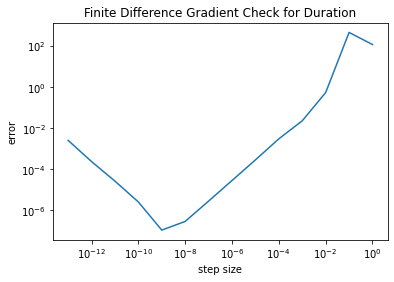

In [6]:
instance.fd_check(1, 0)